In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [60]:
df = pd.read_csv("data/lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


## Fjerner forklaringsvariabler vi ikke trenger

In [61]:
df2 = df[["Theme", "Price", "Pieces", "Pages", "Minifigures"]]

## Fjerner observasjoner med manglende datapunkter

In [62]:
df2 = df2.dropna()

## Gjør themes om til string og fjern alle tegn vi ikke vil ha med

In [63]:
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

## Fjerner dollartegn og trademark-tegn fra datasettet

In [66]:
df2['Price'].astype(str)
df2['Price'] = df2['Price'].str.replace(r'\$', '', regex = True)

## Gjør så prisen om til float

In [67]:
df2['Price'] = df2['Price'].astype(float)

df2

,Theme,Price,Pieces,Pages,Minifigures
13,Friends,7.99,95.0,40.0,1.0
16,Disney,9.99,69.0,28.0,1.0
17,Friends,7.99,85.0,36.0,1.0
18,Friends,7.99,93.0,40.0,2.0
19,City,9.99,92.0,36.0,1.0
...,...,...,...,...,...
1171,Batman,249.99,3306.0,404.0,3.0
1172,Ideas,199.99,3036.0,428.0,4.0
1173,THE LEGO MOVIE 2,299.99,3178.0,452.0,13.0
1174,Jurassic World,249.99,3120.0,464.0,6.0


## Enkel lineær regresjon

In [68]:
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3828.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          2.59e-289
Time:                        15:32:00   Log-Likelihood:                -3206.2
No. Observations:                 717   AIC:                             6416.
Df Residuals:                     715   BIC:                             6426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1957      0.982     10.378      0.000       8.267      12.125
Pieces         0.0874      0.001     61.874      0.000       0.085       0.090
==============================================================================
Omnibus:                      662.393   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61798.469
Skew:                           3.719   Prob(JB):                         0.00
Kurtosis:                      47.869   Cond. No.                         863.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Enkel LR med regresjonslinje

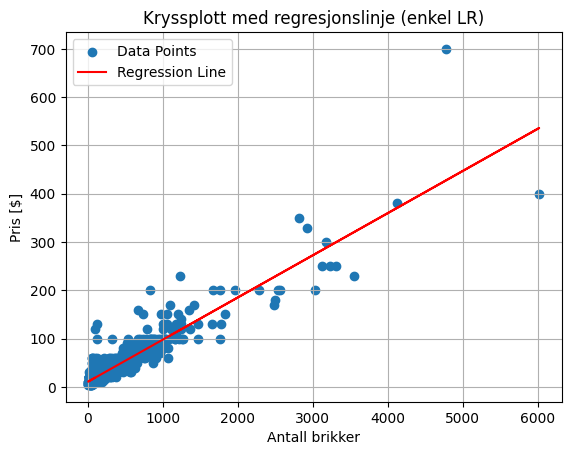

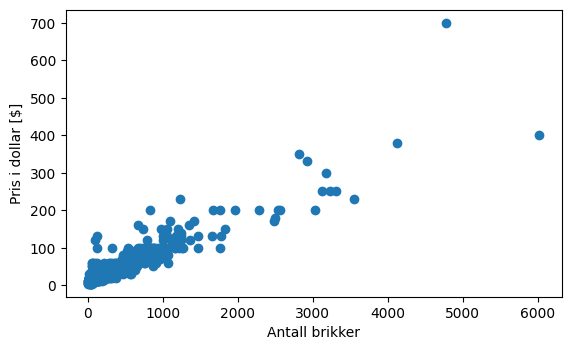

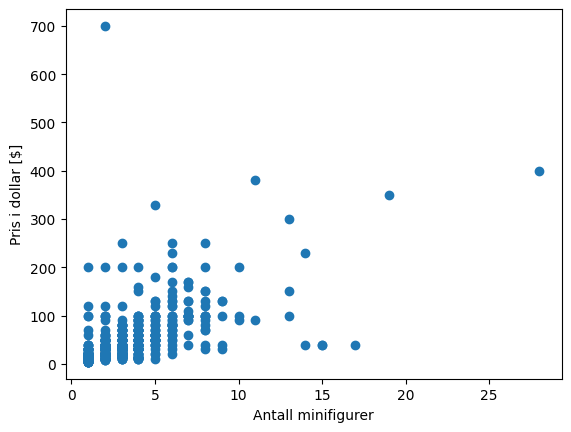

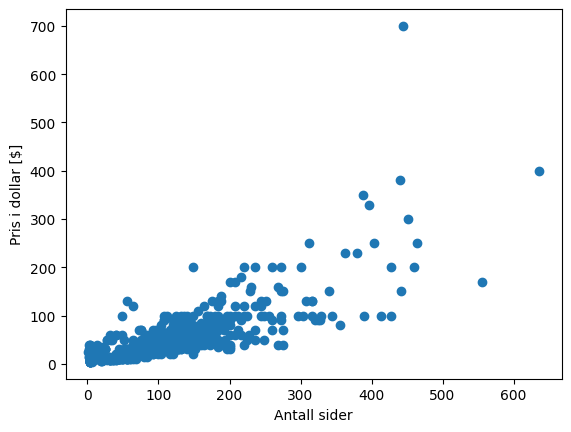

In [69]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()
plt.scatter(df2['Minifigures'], df2['Price'])
plt.xlabel('Antall minifigurer')
plt.ylabel('Pris i dollar [$]')
plt.gca()
plt.show()
plt.scatter(df2['Pages'], df2['Price'])
plt.xlabel('Antall sider')
plt.ylabel('Pris i dollar [$]')
plt.gca()
plt.show()